# **2-1. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!**

In [62]:
# 당뇨병 환자 데이터(diabetes)와 다중 선형 회귀
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

df_X=diabetes.data
df_y=diabetes.target
print(type(df_X))

<class 'numpy.ndarray'>


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

In [64]:
import numpy as np

# 가중치 W와 편향 b 초기화
W = np.random.rand(df_X.shape[1])
b = np.random.rand()

In [65]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [66]:
def compute_gradient(X, y, W, b):
    N = len(y)

    # 예측값 계산
    y_pred = np.dot(X, W) + b

    # 기울기 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()

    return dW, db

In [67]:
num_epochs = 1000

for epoch in range(num_epochs):
    # 기울기 계산
    dW, db = compute_gradient(X_train, y_train, W, b)

    # 가중치 업데이트
    W -= learning_rate * dW
    b -= learning_rate * db

    # 손실 출력
    if epoch % 100 == 0:
        loss = mean_squared_error(y_train, np.dot(X_train, W) + b)
        print(f"Epoch {epoch}, Loss: {loss}")

Epoch 0, Loss: 29562.50610506067
Epoch 100, Loss: 28640.418478654377
Epoch 200, Loss: 27754.459417538626
Epoch 300, Loss: 26903.212152334665
Epoch 400, Loss: 26085.31547217492
Epoch 500, Loss: 25299.46154597981
Epoch 600, Loss: 24544.39382917291
Epoch 700, Loss: 23818.905052484322
Epoch 800, Loss: 23121.835289622846
Epoch 900, Loss: 22452.07010072429


In [68]:
y_pred_test = np.dot(X_test, W) + b
test_loss = mean_squared_error(y_test, y_pred_test)
print(f"Test Loss: {test_loss}")

Test Loss: 19107.15554931471


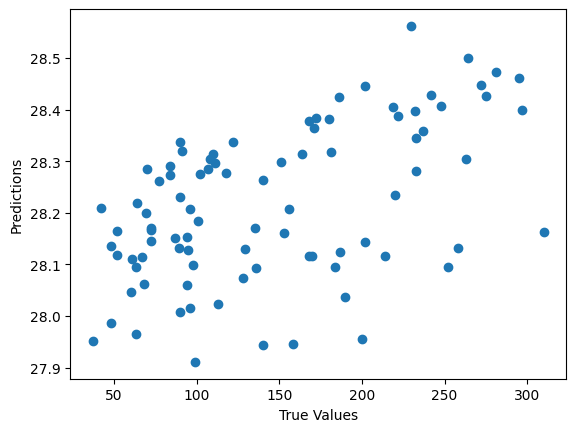

In [69]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_test)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

#**2-2. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?**

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [28]:
from google.colab import drive

# 드라이브 마운트
drive.mount('/content/drive')


Mounted at /content/drive


In [52]:
train = pd.read_csv("/content/drive/MyDrive/aiffel/datasets/Bike Sharing Demand/train.csv")
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [53]:
print(train.info())
print(train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01

In [54]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

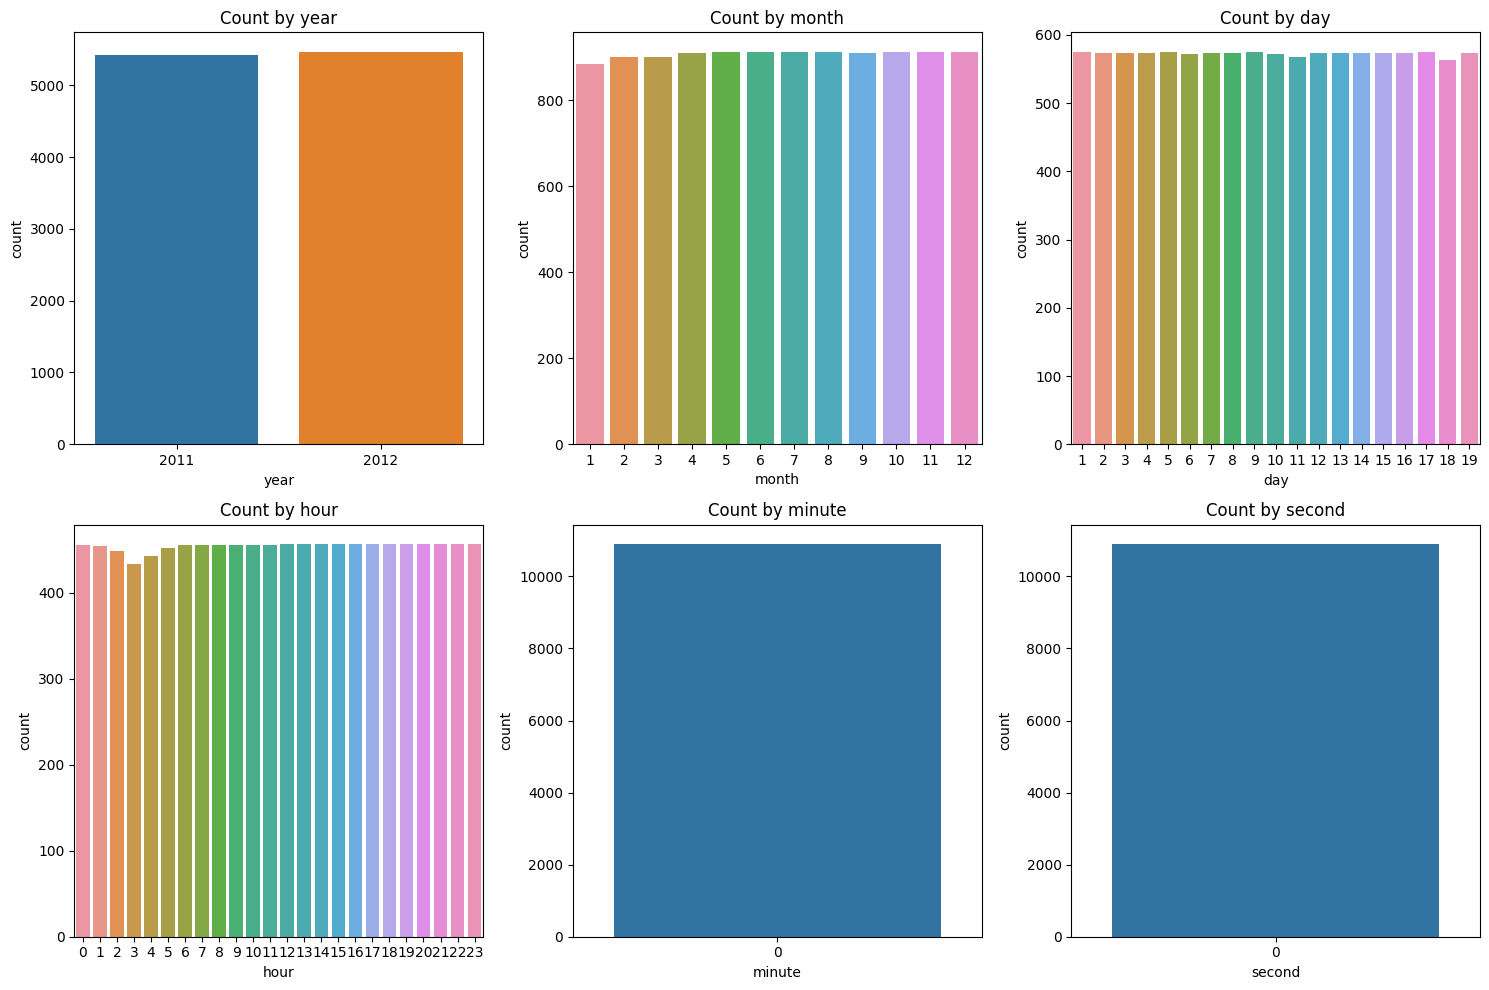

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

time_components = ['year', 'month', 'day', 'hour', 'minute', 'second']

for i, component in enumerate(time_components, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=component, data=train)
    plt.title(f'Count by {component}')

plt.tight_layout()
plt.show()

In [56]:
X = train.drop(['count', 'datetime'], axis=1)
y = train['count']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 2.34198642720452e-25
Root Mean Squared Error: 4.839407429845642e-13


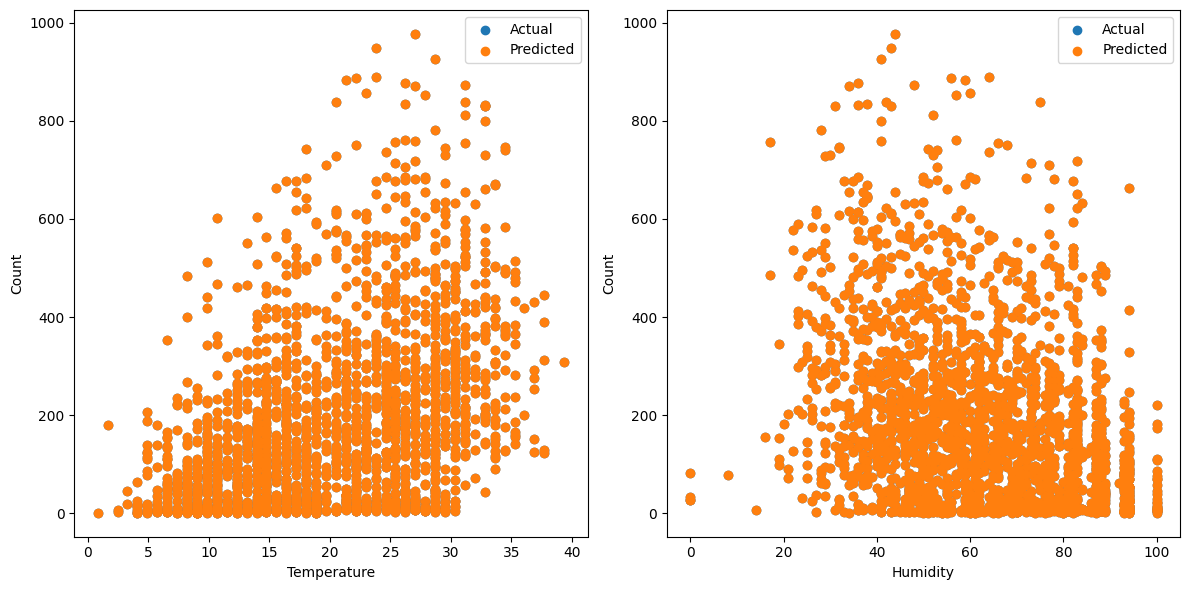

In [61]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test['temp'], y_test, label='Actual')
plt.scatter(X_test['temp'], y_pred, label='Predicted')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test['humidity'], y_test, label='Actual')
plt.scatter(X_test['humidity'], y_pred, label='Predicted')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()